# Data Visualization for COVID - 19 Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
data_path = './data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data_df = pd.read_csv(data_path)
raw_data_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [4]:
dates_col = raw_data_df.columns[4:]

## Determining the length of Raw Data

In [5]:
len(raw_data_df['Country/Region'].unique())

199

In [6]:
temp = []
for each in dates_col:
    temp.append(each)

dates_df = pd.DataFrame(temp)
dates_df.head()

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
dates_df = dates_df.rename(columns={0 : 'date'})

In [8]:
len(dates_df)

917

In [9]:
raw_data_df[raw_data_df['Country/Region'] == "US"].iloc[:,4:].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
7/22/22    90367064
7/23/22    90390185
7/24/22    90410386
7/25/22    90567290
7/26/22    90733888
Length: 917, dtype: int64

In [10]:
dates_df['US'] = np.array(raw_data_df[raw_data_df['Country/Region'] == "US"].iloc[:,4:].sum(axis=0))
dates_df.tail()

,date,US
912,7/22/22,90367064
913,7/23/22,90390185
914,7/24/22,90410386
915,7/25/22,90567290
916,7/26/22,90733888


In [11]:
# countries_list = ['India', 'Germany', 'Italy', 'Australia']
countries_list = raw_data_df['Country/Region']
for each in countries_list:
    dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))

C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))
C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))
C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fr

C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))
C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dates_df[each] = np.array(raw_data_df[raw_data_df['Country/Region'] == each].iloc[:,4:].sum(axis=0))
C:\Users\pench\AppData\Local\Temp\ipykernel_1216\2662310461.py:4: PerformanceWarning: DataFrame is highly fr

In [12]:
dates_df.tail()

,date,US,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
912,7/22/22,90367064,184360,302767,266700,45326,102301,11,8736,9465827,...,967808,242570,11723,531963,10766128,672039,535,11849,328550,256217
913,7/23/22,90390185,184473,303925,266772,45326,102301,11,8736,9465827,...,967808,242632,11723,531963,10767200,672039,535,11849,328550,256246
914,7/24/22,90410386,184587,304890,266839,45326,102301,11,8736,9507562,...,967808,242691,11723,532902,10767948,672039,535,11849,328550,256254
915,7/25/22,90567290,184819,305123,266916,45326,102301,11,8736,9507562,...,967808,242747,11723,533195,10768844,672039,535,11849,329483,256270
916,7/26/22,90733888,185086,306789,267010,45326,102301,11,8741,9507562,...,969803,242811,11723,533195,10770304,682096,535,11849,329483,256284


## Incorporating entire list of countries into a plot


Text(0.5, 1.0, 'Covid Cases with respect to date of origin')

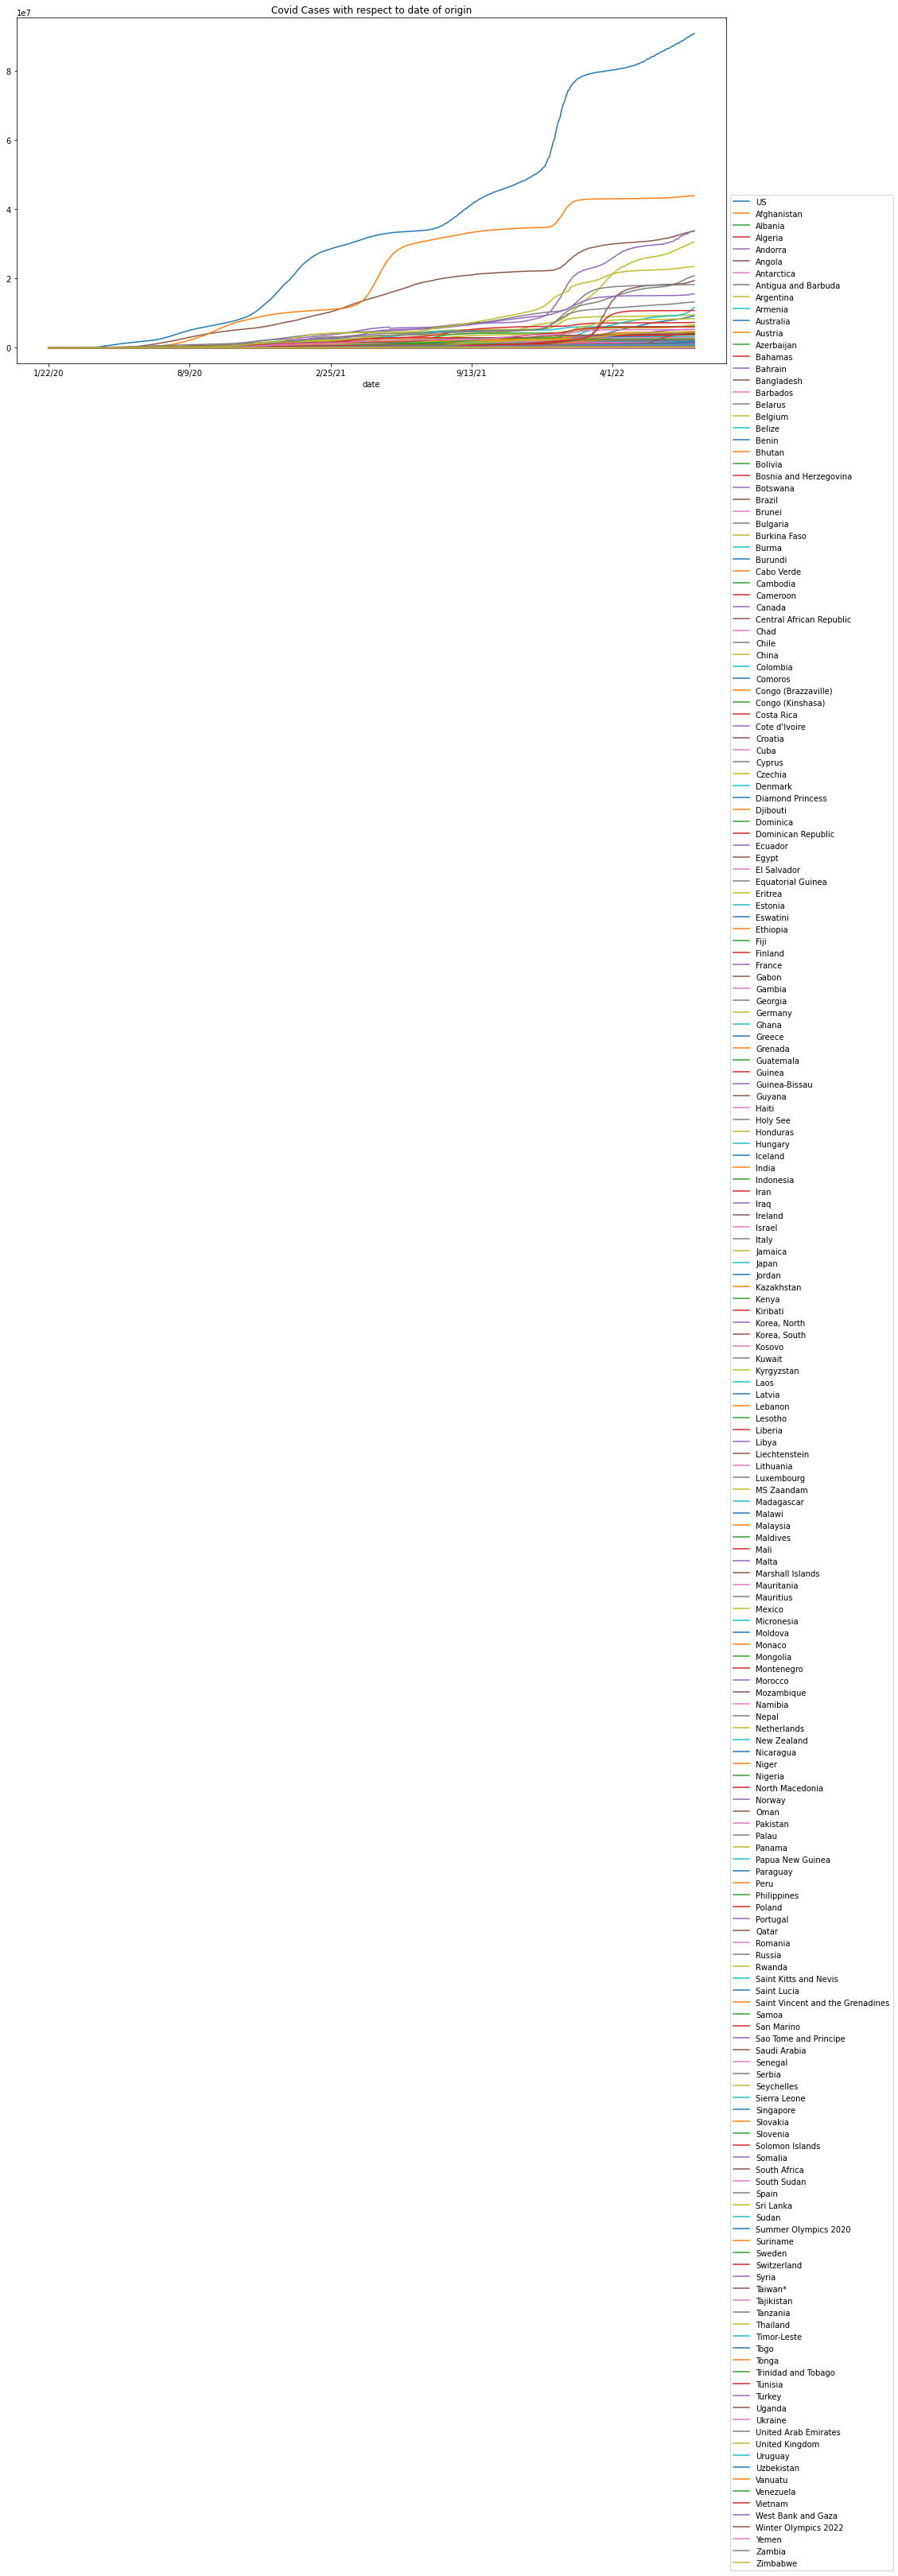

In [13]:
%matplotlib inline
dates_df.set_index('date').plot(figsize= (16,8))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title("Covid Cases with respect to date of origin")

In [14]:
type(dates_df['date'][0])

str

In [15]:
(dates_df['date'][0])

'1/22/20'

In [16]:
x= datetime.strptime(dates_df['date'][0], '%m/%d/%y')
print(x)
print(type (x))

2020-01-22 00:00:00
<class 'datetime.datetime'>


In [17]:
y = datetime.strftime(x, '%Y-%m-%d')
print(y)

2020-01-22


In [18]:
temp_datetime = [datetime.strptime(each, '%m/%d/%y') for each in dates_df['date']]
temp_isoDates = [datetime.strftime(each, '%Y-%m-%d') for each in temp_datetime]

temp_isoDates[0]

'2020-01-22'

In [19]:
dates_df['date'] = temp_isoDates

In [20]:
dates_df.tail()

,date,US,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
912,2022-07-22,90367064,184360,302767,266700,45326,102301,11,8736,9465827,...,967808,242570,11723,531963,10766128,672039,535,11849,328550,256217
913,2022-07-23,90390185,184473,303925,266772,45326,102301,11,8736,9465827,...,967808,242632,11723,531963,10767200,672039,535,11849,328550,256246
914,2022-07-24,90410386,184587,304890,266839,45326,102301,11,8736,9507562,...,967808,242691,11723,532902,10767948,672039,535,11849,328550,256254
915,2022-07-25,90567290,184819,305123,266916,45326,102301,11,8736,9507562,...,967808,242747,11723,533195,10768844,672039,535,11849,329483,256270
916,2022-07-26,90733888,185086,306789,267010,45326,102301,11,8741,9507562,...,969803,242811,11723,533195,10770304,682096,535,11849,329483,256284


In [21]:
dates_df.to_csv('./data/processed/COVID_small_flat_table.csv', sep=';')

In [22]:
pd_data = pd.read_csv('./data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
pd_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


## Renaming desired Parameters

In [23]:
pd_data = pd_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
pd_data = pd_data.drop(['Lat', 'Long'], axis=1)
pd_data.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,0,0,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,0,0,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [24]:
pd_data = pd_data.set_index(['state', 'country'])

In [25]:
pd_data = pd_data.T

In [26]:
pd_data.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [27]:
pd_data = pd_data.stack(level=[0,1])

In [28]:
pd_data = pd_data.reset_index()


In [29]:
pd_data.head()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [30]:
pd_data = pd_data.rename(columns={'level_0':'date', '0' : 'confirmed'})
#pd_data.rename(columns={'level_0':'date', '0' : 'confirmed'})

In [31]:
pd_data.head()

,date,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [32]:
pd_data.dtypes

date        object
state       object
country     object
0          float64
dtype: object

In [33]:
pd_data['date'] = pd_data.date.astype('datetime64[ns]')

In [34]:
pd_data.dtypes

date       datetime64[ns]
state              object
country            object
0                 float64
dtype: object

In [35]:
pd_data.to_csv('./data/processed/COVID_relational_confirmed.csv')